# Visualize BoostDiff results on Bactillus subtilis data

Run this notebook after running BoostDiff on your data.

General recommendations and filtering:

To obtain the final differential network, the raw network should be filtered for target genes in which BoostDiff found a more predictive model for the target condition. This additional step is crucial and part of the pipeline, as a trained model will not always be more predictive of a target condition. For filtering, we recommend to start with filtering target genes using p=3 parameter and n_top_edges=250 to 500 per condition (500 to 1000 edges in the final network) for human datasets.

In [4]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

# Load functions for filtering and visualization
import sys
sys.path.insert(1, "../filtering_visualization")
from postprocessing import *

In [5]:
output_folder = "../outputs_tutorial" # where the BoostDiff outputs are located
keyword = "saltvsmm" # specify the keyword used when running BoostDiff

file_diff_dis = os.path.join(output_folder, "disease", "differences_{}.txt".format(keyword))
file_diff_con = os.path.join(output_folder, "control", "differences_{}.txt".format(keyword))

# Specify the output files containing the network after running BoostDiff
file_net_dis = os.path.join(output_folder, "disease", "boostdiff_network_{}.txt".format(keyword))
file_net_con = os.path.join(output_folder, "control", "boostdiff_network_{}.txt".format(keyword))

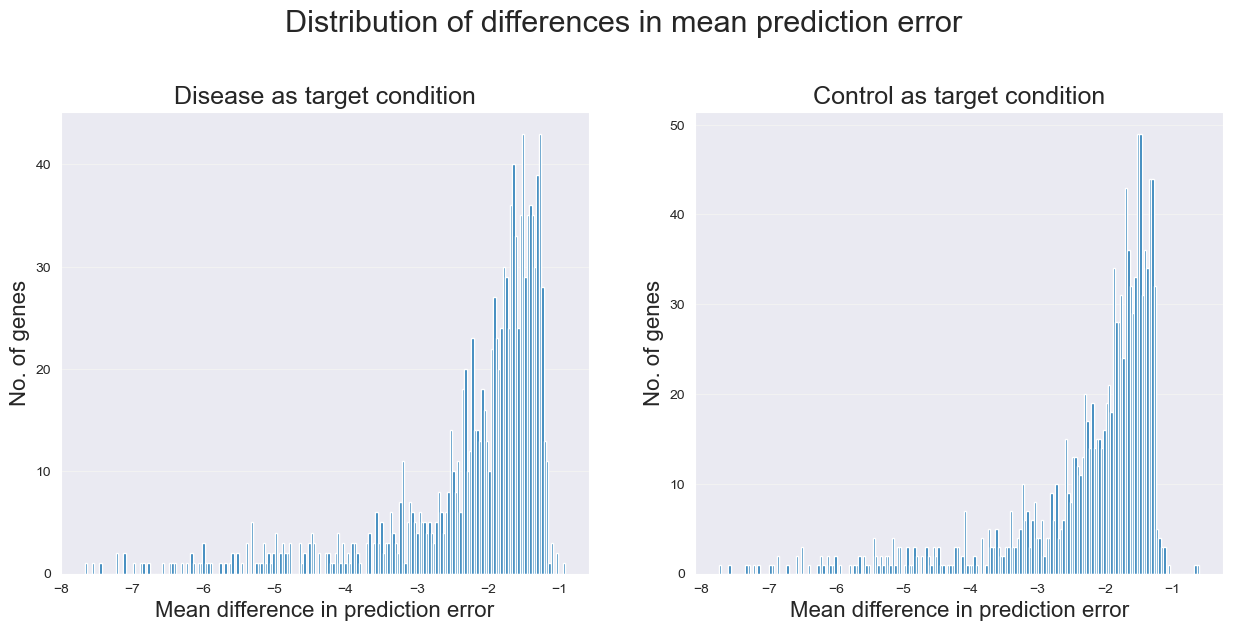

In [6]:
plot_histogram(output_folder, keyword)

In [3]:
# Filter the network
df_dis = filter_network(file_net_dis, file_diff_dis, p=3, n_top_edges=150)
df_con = filter_network(file_net_con, file_diff_con, p=3, n_top_edges=150)
df_dis.head()

Identifying thresholds based on 3th percentile
No of target genes in disease condition satisfying threshold:  37
Extracting the top 150 edges...
Identifying thresholds based on 3th percentile
No of target genes in disease condition satisfying threshold:  37
Extracting the top 150 edges...


,target,regulator,weight
159,5252,873,0.002070
234,5252,2217,0.001666
240,4482,4906,0.001650
245,5252,2346,0.001637
291,4482,548,0.001478


In [6]:
# Map the gene ids to gene names for visualizing the network
file_mapping = "../data/bsubt_map.txt"
df_map = pd.read_csv(file_mapping, sep="\t")
df_map = df_map[["<strong>ID</strong><strong>","GeneSymbol</strong><strong>"]]
df_map.columns = ["id","symbol"]
dict_map = dict(zip(df_map.id, df_map.symbol))
dict_map = {int(float(k)):v for k,v in dict_map.items()}

df_dis = df_dis.replace(dict_map)
df_con = df_con.replace(dict_map)
df_dis.head()

,target,regulator,weight
159,csbD,pspA,0.002070
234,csbD,cysC,0.001666
240,S1199,epsA,0.001650
245,csbD,ylxP,0.001637
291,S1199,yczO,0.001478


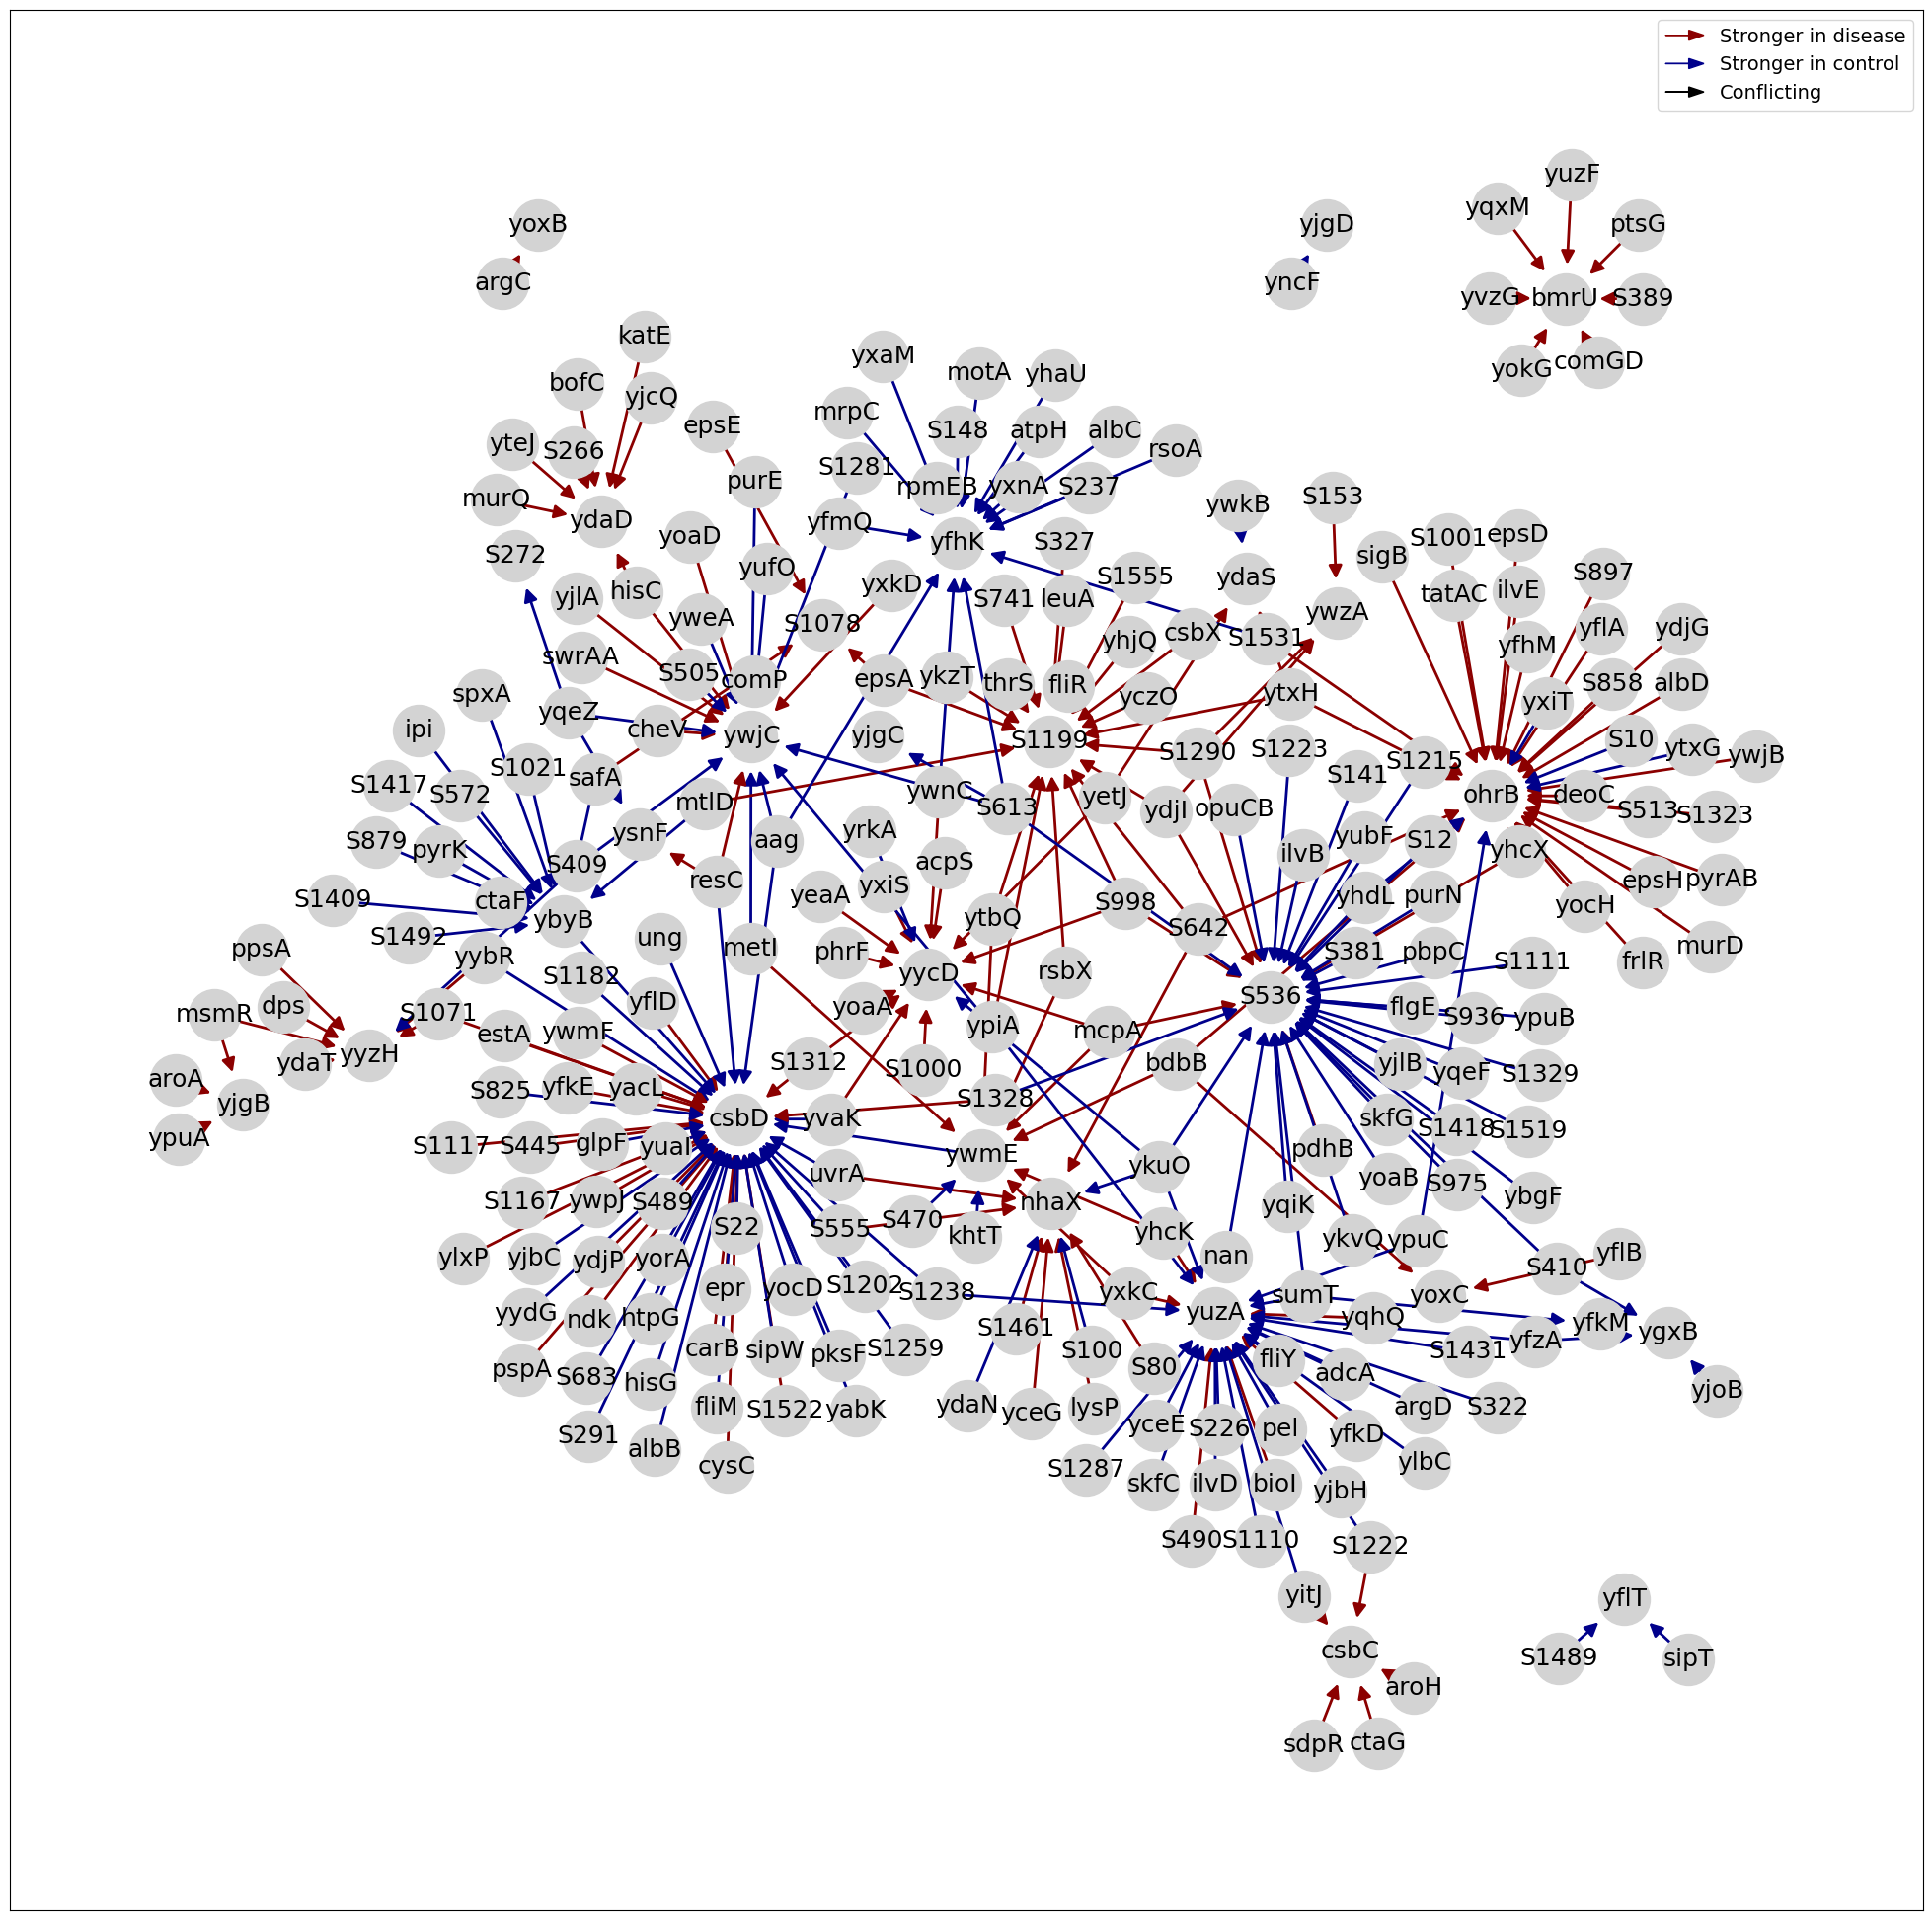

In [7]:
# Plot the resulting network using pygraphviz layouts
# You can use any of the layouts: gv_layout = ["fdp","neato","sfdp"]
file_grn = r"../outputs_tutorial/diff_grn.svg"
plot_grn(df_dis, df_con, layout="graphviz_layout", gv_layout="fdp", show_conflicting=True, 
         fontsize=18, filename=None)

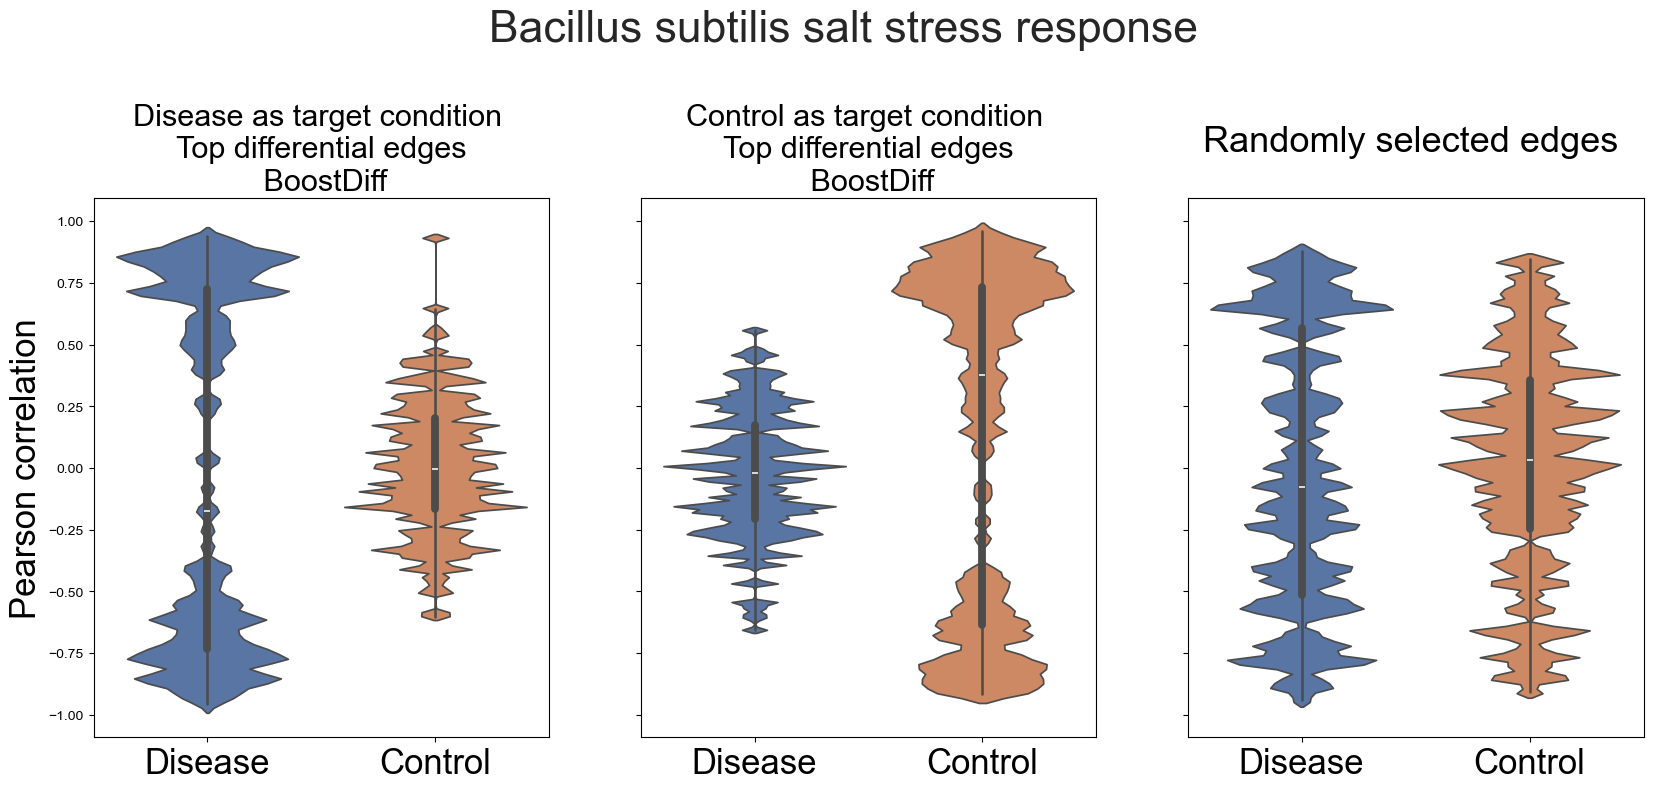

In [8]:
# Plot correlation distributions per target condition

# Load the expression data
file_dis_expr = r"../data/b_subtilis_salt/exprs_salt.txt"
file_con_expr = r"../data/b_subtilis_salt/exprs_smm.txt"

# Get correlations of top edges and randomly selected edges
df_dis, df_con, df_rand = get_correlations(file_dis_expr, file_con_expr, output_folder, 
                                           percentile=3, keyword=keyword, index="Gene", 
                                           n_edges=150)

# Visualize using violin plot
title = "Bacillus subtilis salt stress response"
file_grn = r"../outputs_tutorial/corr_dists_salt_stress.svg"
plot_corr_dists(df_dis, df_con, df_rand, title=title, filename=file_grn, bw_adjust=0.07)